In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/Coffee Shop Sales.csv')

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [17]:
df.tail()

,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
149111,14-06-2023,08:34:10,5,Lower Manhattan,41,4,4.25,17.0,Coffee,Barista Espresso,Cappuccino,Large,June,Wednesday,8,6,2
149112,17-06-2023,09:55:47,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,9,6,5
149113,17-06-2023,10:41:11,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,10,6,5
149114,17-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,11,6,5
149115,30-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Friday,11,6,4


In [5]:
# Removing the 'transaction_id' column
df.drop('transaction_id', axis=1, inplace=True)  # axis=1 specifies that we're dropping a colum

In [6]:
df.shape

(149116, 17)

In [7]:
df.describe()

,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


In [8]:
# Check for null values and count them
null_counts = df.isnull().sum()

# Display null value counts
print("Null value counts:")
print(null_counts)

Null value counts:
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64


In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

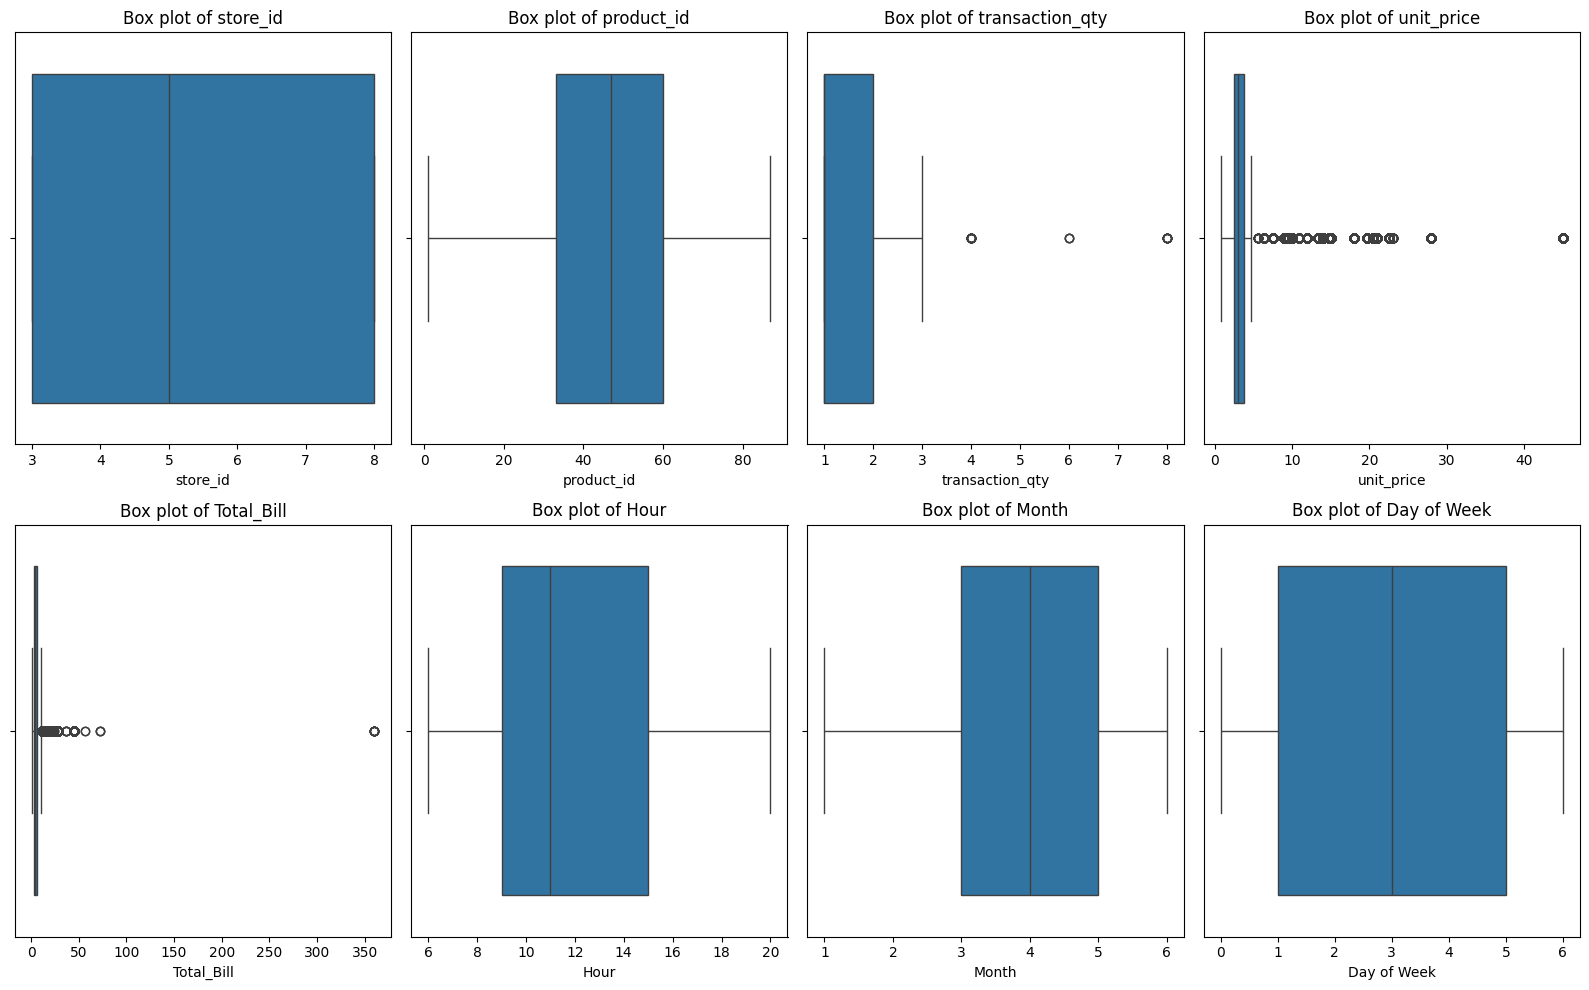

In [10]:
num_rows = 2 
num_cols = (len(numerical_columns) + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical columns and create box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel(column)

# Hide empty subplots
for j in range(len(numerical_columns), num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

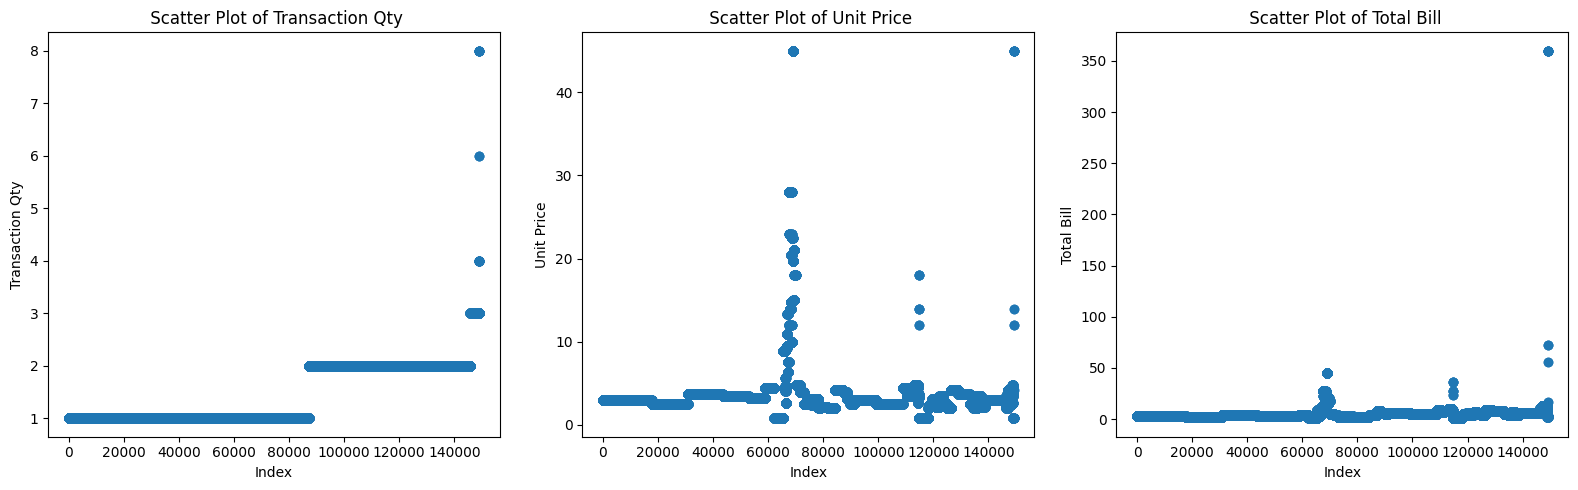

In [18]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(len(df)), df['transaction_qty'])
plt.title(' Scatter Plot of Transaction Qty')
plt.xlabel('Index')
plt.ylabel('Transaction Qty')

plt.subplot(1, 3, 2)
plt.scatter(range(len(df)), df['unit_price'])
plt.title(' Scatter Plot of Unit Price')
plt.xlabel('Index')
plt.ylabel('Unit Price')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df['Total_Bill'])
plt.title(' Scatter Plot of Total Bill')
plt.xlabel('Index')
plt.ylabel('Total Bill')

plt.tight_layout()
plt.show()


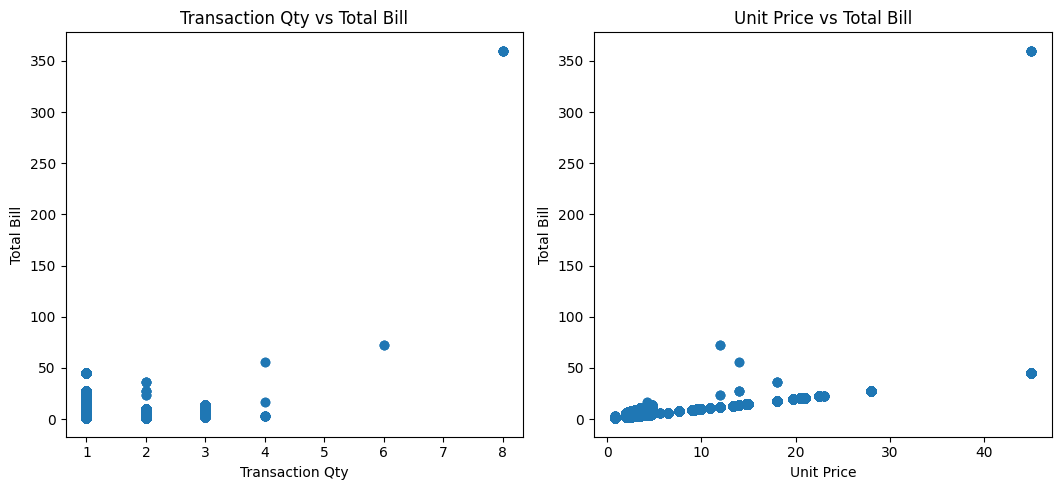

In [13]:
# Create scatter plots to visualize relationships and identify outliers
plt.figure(figsize=(16, 5))

# Scatter plot for transaction_qty vs Total_Bill
plt.subplot(1, 3, 1)
plt.scatter(df['transaction_qty'], df['Total_Bill'])
plt.title('Transaction Qty vs Total Bill')
plt.xlabel('Transaction Qty')
plt.ylabel('Total Bill')

# Scatter plot for unit_price vs Total_Bill
plt.subplot(1, 3, 2)
plt.scatter(df['unit_price'], df['Total_Bill'])
plt.title('Unit Price vs Total Bill')
plt.xlabel('Unit Price')
plt.ylabel('Total Bill')

plt.tight_layout()
plt.show()


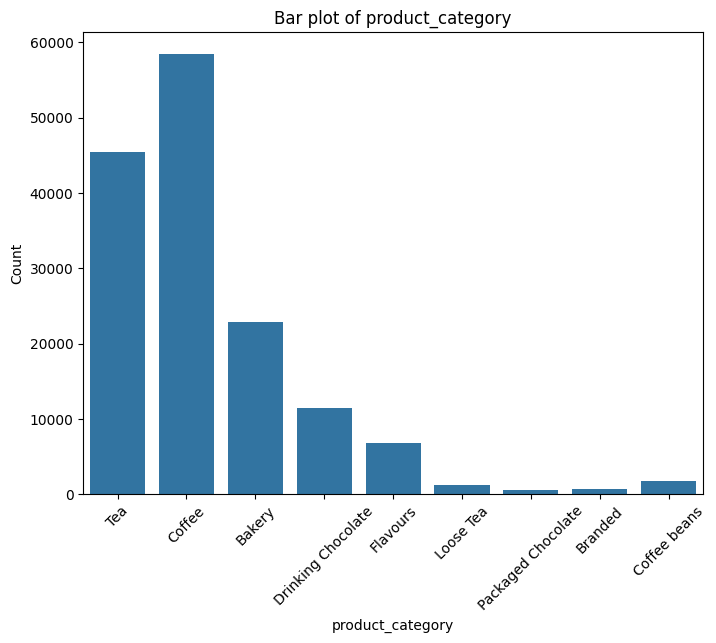

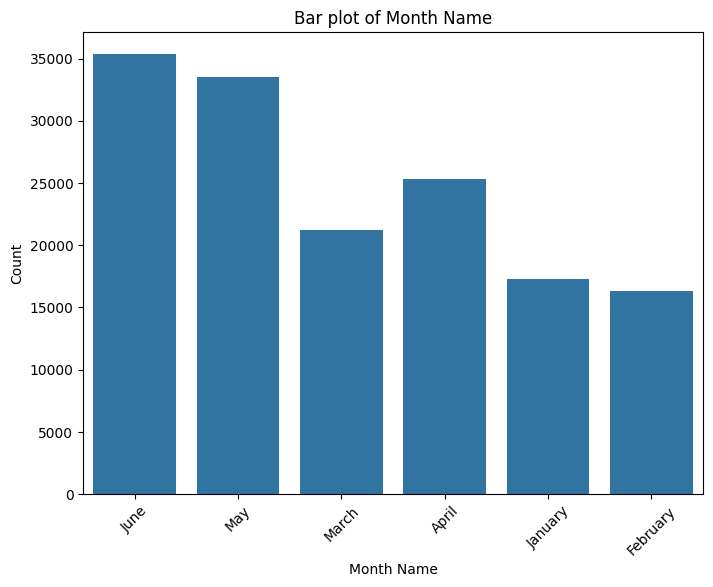

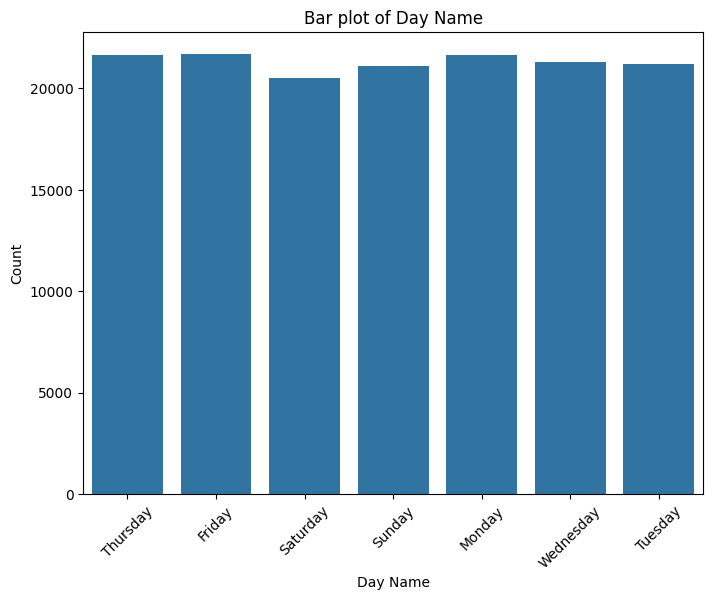

In [16]:
categorical_columns = ['product_category', 'Month Name', 'Day Name']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column])
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
